#### Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data

In [2]:
data = sns.load_dataset('mpg')
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


# Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

subset = data.drop(['name'], axis=1).dropna()
X = subset.drop(['origin'], axis=1).to_numpy()
y = subset.origin.to_numpy()

logReg = LogisticRegression()

print(cross_val_score(logReg, X, y))
print(np.mean(cross_val_score(logReg, X, y)))

[0.84810127 0.78481013 0.78205128 0.78205128 0.58974359]
0.7573515092502434


# Bootstrapping

Distribution:
	mean: 1.5846139304236244
	std: 3.6144647065785187

Confidence Interval:
	low: 3.1841618412487787
	high: 4.1492608293667645


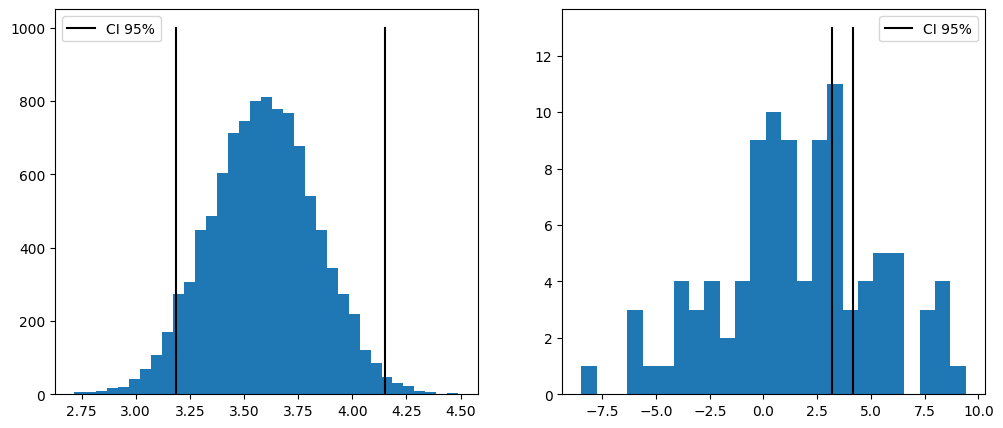

In [63]:
from scipy.stats import bootstrap

np.random.seed(42)
nor = np.random.normal(loc=2, scale=4, size=(1, 100))
print(f"Distribution:\n\tmean: {nor.mean()}\n\tstd: {nor.std()}\n")

bts = bootstrap(nor, np.std, confidence_level=0.95)
low, high = bts.confidence_interval.low, bts.confidence_interval.high
print(f"Confidence Interval:\n\tlow: {low}\n\thigh: {high}")

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

ax[0].hist(bts.bootstrap_distribution, bins=35)
ax[0].plot([low,low], [0,1000], c='k', label='CI 95%')
ax[0].plot([high,high], [0,1000], c='k')
ax[0].legend()

ax[1].hist(nor[0], bins=25)
ax[1].plot([low,low], [0,13], c='k', label='CI 95%')
ax[1].plot([high,high], [0,13], c='k')
ax[1].legend()

plt.show()